In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [19]:
df = pd.read_csv(r"C:\Users\faiza\Desktop\ecommerce.csv",encoding = 'unicode_escape')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(df.describe())
df.shape

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


(541909, 8)

In [4]:
# Remove the duplicate entries in the dataset
print(df.duplicated().sum())    
df.drop_duplicates(inplace = True)
df.shape

5268


(536641, 8)

In [7]:
#Removing missing values based on  CustomerID.
df.dropna(axis = 0, subset =['CustomerID'], inplace = True)
df.shape 
print (pd.DataFrame(df.isnull().sum()))    



             0
InvoiceNo    0
StockCode    0
Description  0
Quantity     0
InvoiceDate  0
UnitPrice    0
CustomerID   0
Country      0


In [8]:
df_customerid_groups=df.groupby("CustomerID")
print (len((df_customerid_groups.groups)))
df_cluster=pd.DataFrame(columns=['Quantity','UnitPrice','CustomerID'])
count=0
for k,v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), k]
    count+=1
df_cluster.shape

4372


(4372, 3)

In [9]:
# Applying K-Means Clustering Algorithm
# We use only 'Quantity','UnitPrice' columns to cluser 
X = df_cluster.iloc[:, [0, 1]].values

In [10]:
# Feature Scaling
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

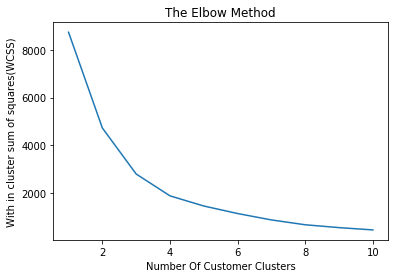

In [11]:
#Using the Elbow method to find the optical number of clusters
wcss = [] #With in cluster sum of squares(Inertia)
'''
#n_clusters is no.of clusters given by this method,
#k-means++ is an random initialization methods for centriods to avoid random intialization trap,
#max_iter is max no of iterations defined when k-means is running
#n_init is no of times k-means will run with different initial centroids
'''
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters')
plt.ylabel('With in cluster sum of squares(WCSS)')
plt.show()

In [12]:
#From the plot we can see that at 3 distortion goes rapidly so n_clusters=3
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)


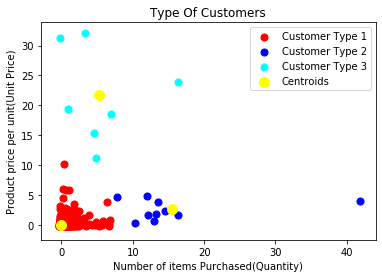

In [17]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'cyan', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit(Unit Price)')
plt.legend()
plt.show()